In [12]:
import numpy as np
from sklearn import *

In [13]:
m  = 60000;
low = 1
high = 40

In [14]:
d_vals = np.arange(low, high, 1)
exp_var = []
print(d_vals)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]


In [15]:
def gen_x(d, m):
    X = np.random.normal(0, 1, (d,2*m))
    return X

In [16]:
def gen_y(X,d,m,w_b):
    y = np.zeros((2*m ,))
    for i in range(2*m):
        samp = np.random.normal(w_b @ X[:, i], 1)
        y[i] = samp
    return y

In [17]:
def find_exp_var(d,m, prnt = False):
    X = gen_x(d, m)
    w_b = np.random.randn(d,) #the bayes optimal w
    y = gen_y(X, d, m, w_b)
    X_train, X_test, y_train, y_test = model_selection.train_test_split(X.T, y, test_size = 0.5, shuffle = True)
    reg = linear_model.LinearRegression().fit(X_train, y_train)
    score = reg.score(X_test,y_test)
    coefficients = reg.coef_
    y_predict = reg.predict(X_test)
    exvar = metrics.explained_variance_score(y_test,y_predict)
    if(prnt):
        print(coefficients)
        print(w_b)
    return exvar


In [18]:
find_exp_var(5, m, prnt = True)
find_exp_var(6, m)

[-1.0294763   0.97391138 -1.15329299 -1.9395024   2.47316485]
[-1.02284657  0.97696468 -1.15387428 -1.937152    2.46657585]


0.9069059827335766

In [19]:
d_vals.shape[0]

39

In [20]:
for i in range(d_vals.shape[0]):
    exp_var.append(find_exp_var(d_vals[i], m))
    print("Iteration : "  + str(i) + " exp_var : ", find_exp_var(d_vals[i], m))

Iteration : 0 exp_var :  0.35867596808106617
Iteration : 1 exp_var :  0.6762733317535846
Iteration : 2 exp_var :  0.6694858853606136
Iteration : 3 exp_var :  0.8671232884870519
Iteration : 4 exp_var :  0.780187400509457
Iteration : 5 exp_var :  0.7386327293006836
Iteration : 6 exp_var :  0.8138124384837064
Iteration : 7 exp_var :  0.8450358111785671
Iteration : 8 exp_var :  0.6678666995277526
Iteration : 9 exp_var :  0.9215199884633669
Iteration : 10 exp_var :  0.8771276340382181
Iteration : 11 exp_var :  0.822346587029284
Iteration : 12 exp_var :  0.9149767028169944
Iteration : 13 exp_var :  0.9435180046687507
Iteration : 14 exp_var :  0.9052063570007159
Iteration : 15 exp_var :  0.9486042218360962
Iteration : 16 exp_var :  0.9339794611753746
Iteration : 17 exp_var :  0.9678832919442841
Iteration : 18 exp_var :  0.9463361973364962
Iteration : 19 exp_var :  0.9342487983480249
Iteration : 20 exp_var :  0.9691511735642622
Iteration : 21 exp_var :  0.9621699014824161
Iteration : 22 exp_va

In [21]:
print(exp_var)

[0.03909289719481812, 0.37776778316797066, 0.8483770851847056, 0.9012818726743009, 0.43953883080456413, 0.8148456568548526, 0.830096192913861, 0.9354422027678111, 0.9001880954929395, 0.920933086461779, 0.8914445589959104, 0.9259463561728163, 0.9464060326952892, 0.945322721541083, 0.9304193162522754, 0.8924212848904637, 0.9473274298648041, 0.9746681190007509, 0.9585603292762718, 0.926023785197749, 0.939132490328955, 0.9504744828857241, 0.9709764163230274, 0.9655620904744533, 0.9601493546621187, 0.9590973283472218, 0.9746317030448828, 0.9501211201020381, 0.952798025835616, 0.9708474359309048, 0.9679837457631945, 0.961920479085825, 0.969032159026107, 0.9730294795750587, 0.9724797003345746, 0.9692738180257351, 0.9739160828587585, 0.9693374996034841, 0.9718285236402533]


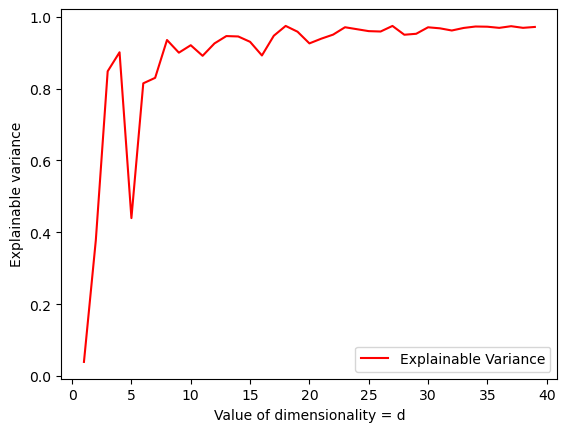

In [22]:
import matplotlib.pyplot as plt
plt.plot(d_vals, exp_var, color= 'r', label = 'Explainable Variance')
plt.xlabel("Value of dimensionality = d")
plt.ylabel("Explainable variance")
plt.legend()